In [2]:
import os
import cv2
import glob
%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np
import sklearn.base
import bhtsne
from sklearn.cluster import KMeans


In [42]:
class BHTSNE(sklearn.base.BaseEstimator, sklearn.base.TransformerMixin):

    def __init__(self, dimensions=2, perplexity=30.0, theta=0.5, rand_seed=-1):
        self.dimensions = dimensions
        self.perplexity = perplexity
        self.theta = theta
        self.rand_seed = rand_seed

    def fit_transform(self, x):
        return bhtsne.tsne(
            x.astype(np.float64), dimensions=self.dimensions, perplexity=self.perplexity, theta=self.theta,
            rand_seed=self.rand_seed)
    
class FacialDataset:
    def __init__(self,sid):
        self.load_subject(sid)
    def load_subject(self, sid):
        image_list = []
        for file in sorted(glob.glob('/home/morinaga/work/faceImage/{}/*.jpg'.format(sid))):
            image_list.append(cv2.imread(file, cv2.IMREAD_GRAYSCALE).flatten())
        self.data = np.asarray(image_list)
        self.data = self.data[::10,:] # 10 frame間隔で間引いてデータ数を減らす
    
    def apply_tsne(self):
        sne=BHTSNE()
        return sne.fit_transform(self.data)
    
    def apply_kmeans(self, n_clusters=3):
        pred = KMeans(n_clusters=n_clusters).fit_predict(self.data)
        colors=['r','g','b','k','y','m'] #colors
        x=self.apply_tsne()
        for i in range(n_clusters):
            plt.plot(x[pred==i,0], x[pred==i,1],colors[i]+'x')
        plt.figure()
        plt.plot(pred,'-x')
        plt.xlabel('frame')
        plt.ylabel('label')
        for i in range(n_clusters):
            plt.figure()
            plt.imshow(self.data[pred==i].mean(0).reshape(96,96))
            plt.gray()

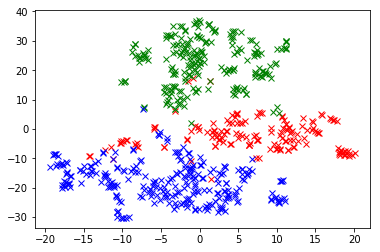

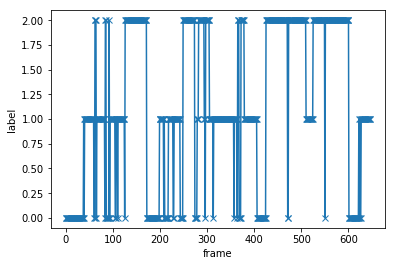

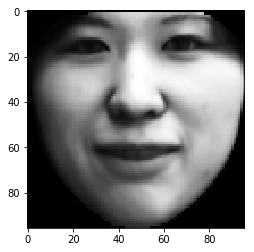

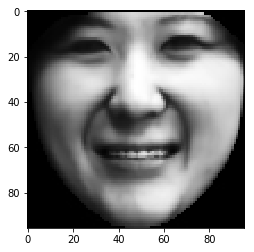

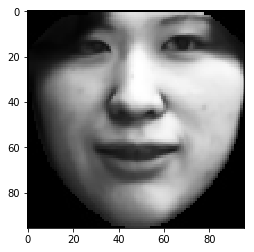

In [43]:
subject1=FacialDataset('001')
subject1.apply_kmeans(3)

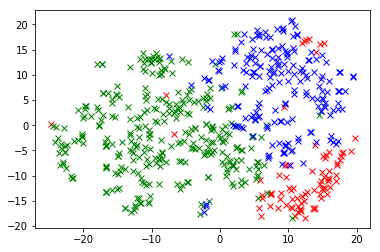

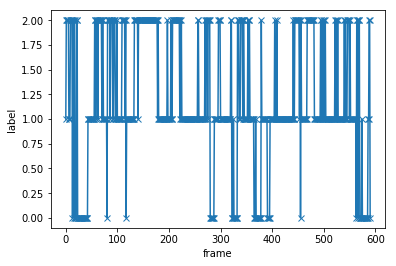

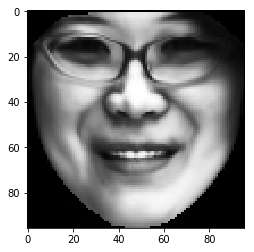

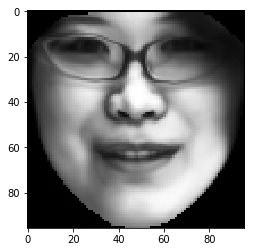

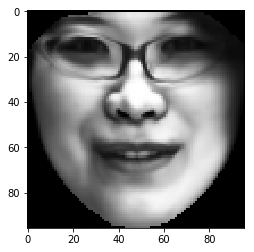

In [44]:
subject2=FacialDataset('002')
subject2.apply_kmeans(3)

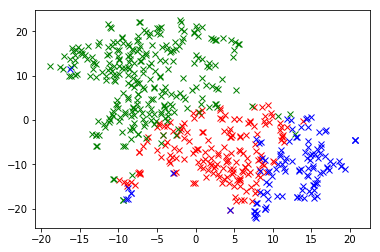

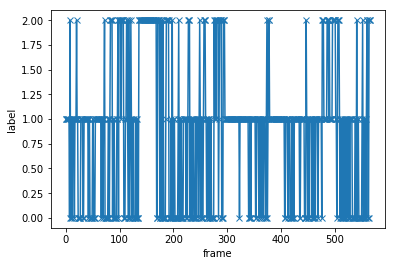

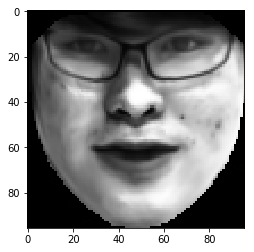

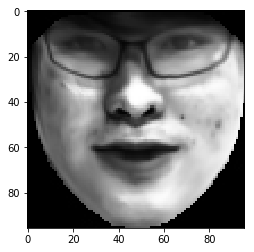

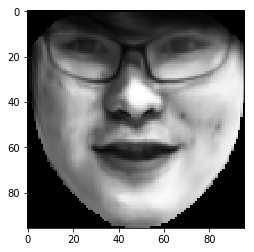

In [45]:
subject3=FacialDataset('003')
subject3.apply_kmeans(3)

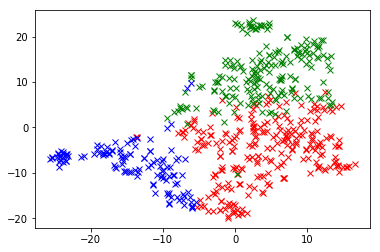

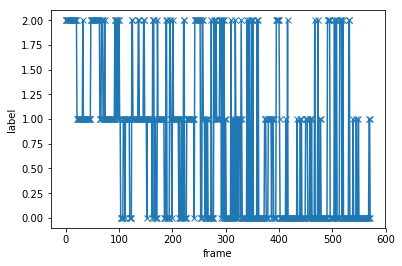

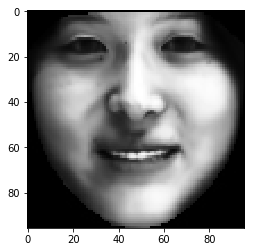

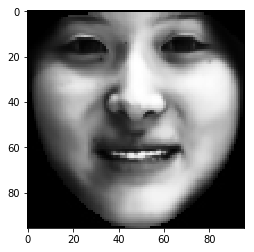

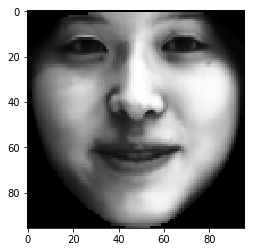

In [46]:
subject4=FacialDataset('004')
subject4.apply_kmeans(3)

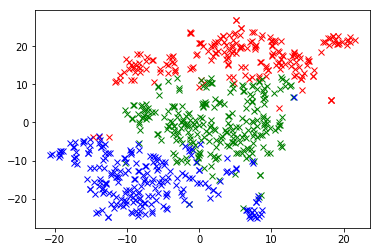

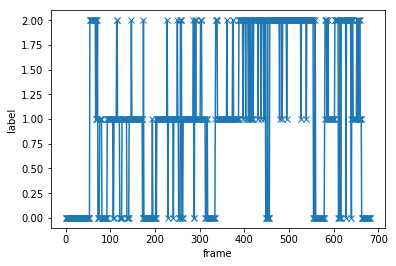

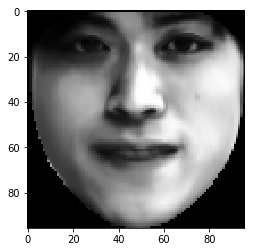

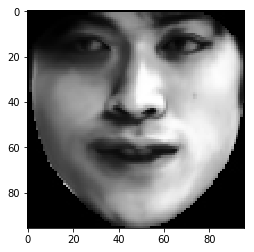

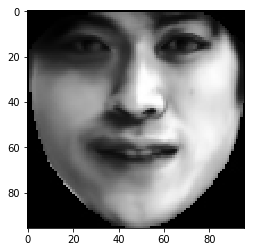

In [47]:
subject5=FacialDataset('005')
subject5.apply_kmeans(3)

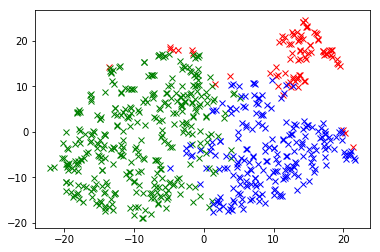

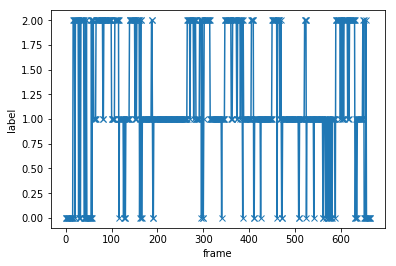

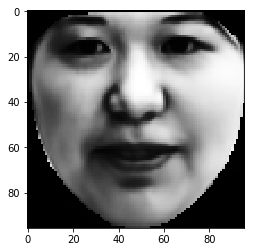

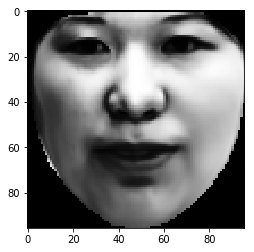

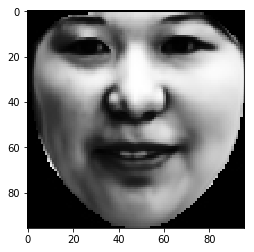

In [48]:
subject6=FacialDataset('006')
subject6.apply_kmeans(3)

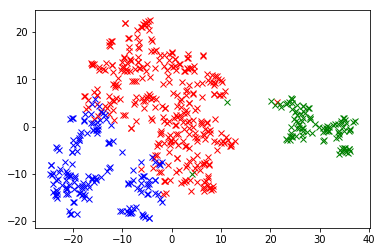

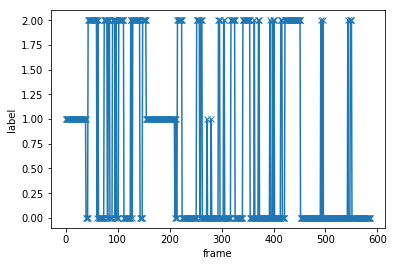

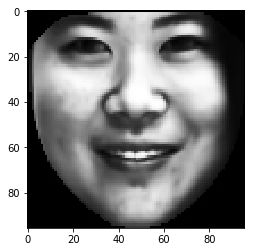

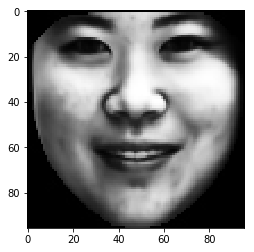

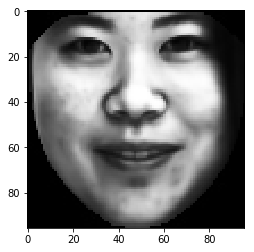

In [49]:
subject7=FacialDataset('007')
subject7.apply_kmeans(3)

In [ ]:
subject8=FacialDataset('008')
subject8.apply_kmeans(3)

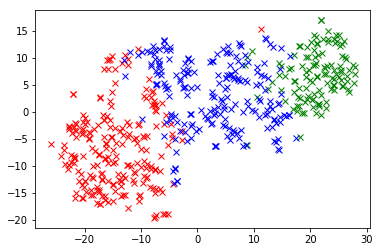

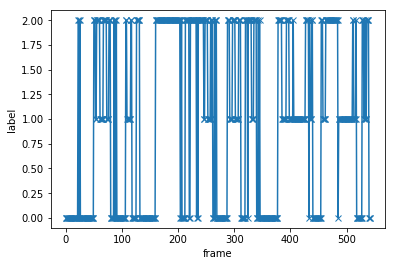

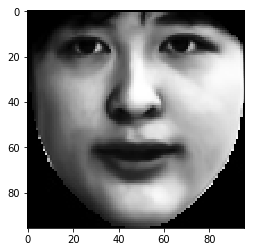

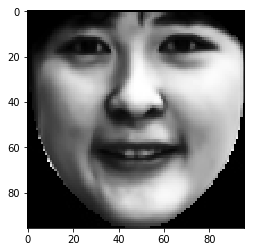

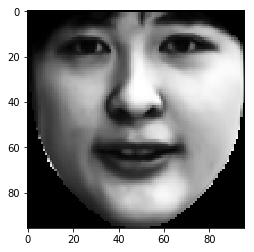

In [50]:
subject9=FacialDataset('009')
subject9.apply_kmeans(3)

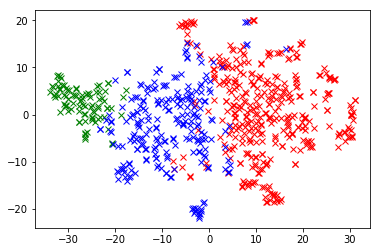

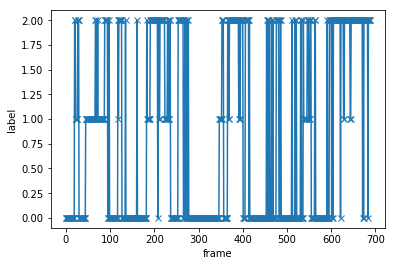

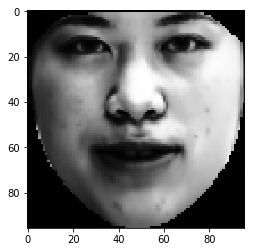

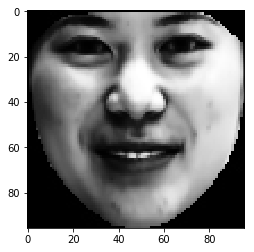

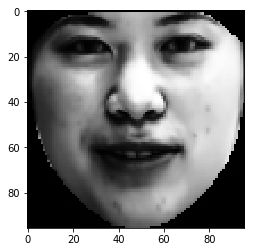

In [51]:
subject10=FacialDataset('010')
subject10.apply_kmeans(3)